In [38]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
train_df = pd.read_csv("/Users/JustinHolmes/Desktop/Titanic Data/train.csv")
test_df = pd.read_csv("/Users/JustinHolmes/Desktop/Titanic Data/test.csv")
combine = [train_df, test_df]

In [40]:
#train_df.head()

In [41]:
# train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by='Survived', ascending=False)



# Trends
Women are more likely to survive // 
As class increases, so does survival // 
As age increases, survival decreases // 
As SibSp increases, survival decreases // 
As Parch increases, survival drops (after 1)

In [42]:
# plot = sns.FacetGrid(train_df, col='Survived')
# plot.map(plt.hist, 'Age', bins=20)

### Observations

Oldest people survived, youngest people (<5) had high survival rate, lots of people 15-30 died

In [43]:
# plot = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
# #plot = sns.FacetGrid(train_df, col='Survived', row ='Pclass', height = 2.2, aspect = 1.6)
# plot.map(plt.hist, "Age", alpha=0.5, bins=20)
# plot.add_legend()

### Observations

Pclass 3 died more, Pclass 1 survived more, more young Pclass 2 people survived, infants across all classes mostly survived

In [44]:
# grid = sns.FacetGrid(train_df, col='Embarked')
# #grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
# grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
# grid.add_legend()

### Observations

Women survived more at S and Q, but not from C (might be from correlation with class), women frequently survive more than men

In [45]:
#grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
# grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
# grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
# grid.add_legend()

### Observations

Increase in fare increases survival at S and C (especially C) but not Q

In [46]:
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
#train_df.head()

In [47]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
#pd.crosstab(train_df['Title'], train_df['Sex'])

In [48]:
for dataset in combine:
    dataset["Title"] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset["Title"] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset["Title"] = dataset['Title'].replace(['Mme'], 'Mrs')
    
#train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

In [49]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)
    
#train_df.head()

In [50]:
train_df = train_df.drop(['PassengerId', 'Name'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)
combine = [train_df, test_df]
#train_df.head()

In [51]:
for dataset in combine:
    dataset['Sex'] = dataset["Sex"].map({"male":0, "female":1}).astype(int)
    
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
5,0,3,0,NaN,0,0,8.4583,Q,1
6,0,1,0,54.0,0,0,51.8625,S,1
7,0,3,0,2.0,3,1,21.0750,S,4
8,1,3,1,27.0,0,2,11.1333,S,3
9,1,2,1,14.0,1,0,30.0708,C,3


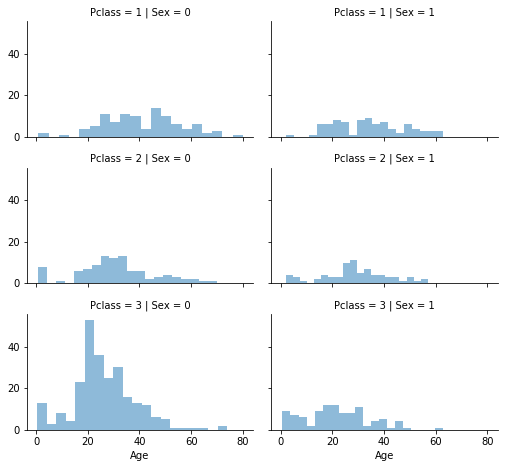

In [52]:
#grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [53]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [54]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
           

            age_guess = guess_df.median()

            
            #Convert random age float to nearest .5 age
            guess_ages[i,j] = int((age_guess/0.5 + 0.5)) * 0.5

            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) &
                        (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

#train_df.head()

In [55]:
train_df["AgeBand"] = pd.cut(train_df["Age"], 5)
train_df[["AgeBand", "Survived"]].groupby(["AgeBand"], as_index=False).mean().sort_values(by="AgeBand", ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [56]:
for dataset in combine:
    dataset.loc[dataset['Age']<=16, 'Age'] = 0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32), 'Age'] = 1
    dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48), 'Age'] = 2
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [57]:
train_df = train_df.drop(["AgeBand"], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [58]:
for dataset in combine:
    dataset["Family Size"] = dataset['SibSp'] + dataset['Parch']+1
    
train_df[["Family Size", "Survived"]].groupby(["Family Size"], as_index=False).mean().sort_values(by="Family Size", ascending = True)



,Family Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [59]:
for dataset in combine:
    dataset['IsAlone'] = 0
    
    dataset.loc[dataset["Family Size"] == 1, "IsAlone"] = 1
    
train_df[["IsAlone", "Survived"]].groupby(["IsAlone"], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [60]:
train_df = train_df.drop(["Parch", 'SibSp', 'Family Size'], axis=1)
test_df = test_df.drop(["Parch", 'SibSp', 'Family Size'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [61]:
for dataset in combine:
    dataset["Age*Class"] = dataset.Age*dataset.Pclass
    
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)
train_df[["Survived", "Age*Class"]].groupby(["Age*Class"], as_index=False).mean().sort_values(by="Age*Class", ascending=False)


,Age*Class,Survived
8,12,0.000000
7,9,0.111111
6,8,0.000000
5,6,0.149425
4,4,0.415094
3,3,0.277487
2,2,0.520408
1,1,0.728814
0,0,0.550000


In [62]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [63]:
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [64]:
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].map({'S':0, 'C':1, 'Q':2}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [65]:
test_df["Fare"].fillna(test_df["Fare"].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [66]:
train_df["FareBand"] = pd.qcut(train_df["Fare"], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [67]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,FareBand
0,0,3,0,1,7.2500,0,1,0,3,"(-0.001, 7.91]"
1,1,1,1,2,71.2833,1,3,0,2,"(31.0, 512.329]"
2,1,3,1,1,7.9250,0,2,1,3,"(7.91, 14.454]"
3,1,1,1,2,53.1000,0,3,0,2,"(31.0, 512.329]"
4,0,3,0,2,8.0500,0,1,1,6,"(7.91, 14.454]"


In [68]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [69]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


In [70]:
X_Train = train_df.drop(["Survived"], axis=1)
Y_Train = train_df["Survived"]
X_Test = test_df.drop(["PassengerId"], axis=1).copy()

X_Train.shape, Y_Train.shape, X_Test.shape

((891, 8), (891,), (418, 8))

In [71]:
X_Train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,1,0,0,1,0,3
1,1,1,2,3,1,3,0,2
2,3,1,1,1,0,2,1,3
3,1,1,2,3,0,3,0,2
4,3,0,2,1,0,1,1,6


In [72]:
Y_Train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [73]:
X_Test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3


### Logistic Regression

In [171]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_Train, Y_Train)
Y_Pred = logreg.predict(X_Test)
acc_log = round(logreg.score(X_Train, Y_Train) * 100, 2)
acc_log

81.26

In [172]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.200978
5,Title,0.414362
4,Embarked,0.281026
6,IsAlone,0.262084
3,Fare,-0.022062
7,Age*Class,-0.085959
2,Age,-0.371647
0,Pclass,-1.083515


### Support Vector Machines

In [173]:
svc = SVC()
svc.fit(X_Train, Y_Train)
Y_Pred = svc.predict(X_Test)
acc_svc = round(svc.score(X_Train, Y_Train) * 100, 2)
acc_svc

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.5

### k-Nearest Neighbors

In [174]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_Train, Y_Train)
Y_Pred = knn.predict(X_Test)
acc_knn = round(knn.score(X_Train, Y_Train) * 100, 2)
acc_knn

84.06

### Gaussian Naive Bayes

In [175]:
gaussian = GaussianNB()
gaussian.fit(X_Train, Y_Train)
Y_Pred = gaussian.predict(X_Test)
acc_gaussian = round(gaussian.score(X_Train, Y_Train) * 100, 2)
acc_gaussian

76.88

### Perceptron

In [176]:
perceptron = Perceptron()
perceptron.fit(X_Train, Y_Train)
Y_Pred = perceptron.predict(X_Test)
acc_perceptron = round(perceptron.score(X_Train, Y_Train) * 100, 2)
acc_perceptron

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


78.79

### Linear SVC

In [177]:
linear_svc = LinearSVC()
linear_svc.fit(X_Train, Y_Train)
Y_Pred = linear_svc.predict(X_Test)
acc_linear_svc = round(linear_svc.score(X_Train, Y_Train) * 100, 2)
acc_linear_svc

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.46

### Stochastic Gradient Descent

In [178]:
sgd = SGDClassifier()
sgd.fit(X_Train, Y_Train)
Y_pred = sgd.predict(X_Test)
acc_sgd = round(sgd.score(X_Train, Y_Train) * 100, 2)
acc_sgd

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


74.75

### Decision Tree

In [179]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_Train, Y_Train)
Y_pred = decision_tree.predict(X_Test)
acc_decision_tree = round(decision_tree.score(X_Train, Y_Train) * 100, 2)
acc_decision_tree

86.64

### Random Forest

In [180]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_Train, Y_Train)
Y_pred_forrest = random_forest.predict(X_Test)
acc_random_forest = round(random_forest.score(X_Train, Y_Train) * 100, 2)
acc_random_forest

86.64

## Model Evaluation

In [181]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,84.06
0,Support Vector Machines,83.50
2,Logistic Regression,81.26
7,Linear SVC,79.46
5,Perceptron,78.79
4,Naive Bayes,76.88
6,Stochastic Gradient Decent,74.75


In [182]:
#submissions = pd.DataFrame({"PassengerID": test_df["PassengerId"], "Survived": Y_pred_forrest})

In [183]:
#submissions.to_csv("/Users/JustinHolmes/Desktop/Titanic Data/Submissions.csv", index=False)